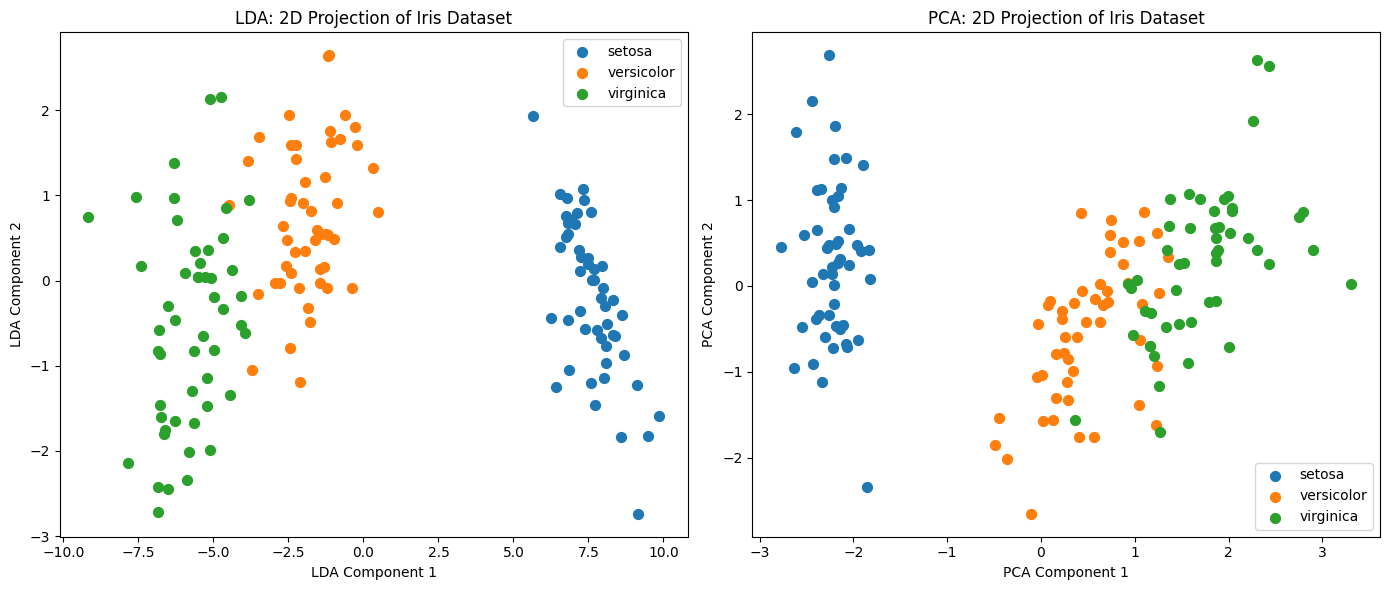

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i, target_name in zip(range(3), iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name, s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA: 2D Projection of Iris Dataset')
plt.legend()
plt.subplot(1, 2, 2)
for i, target_name in zip(range(3), iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: 2D Projection of Iris Dataset')
plt.legend()
plt.tight_layout()
plt.show()


LDA Classifier Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Logistic Regression Classifier Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
 [[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


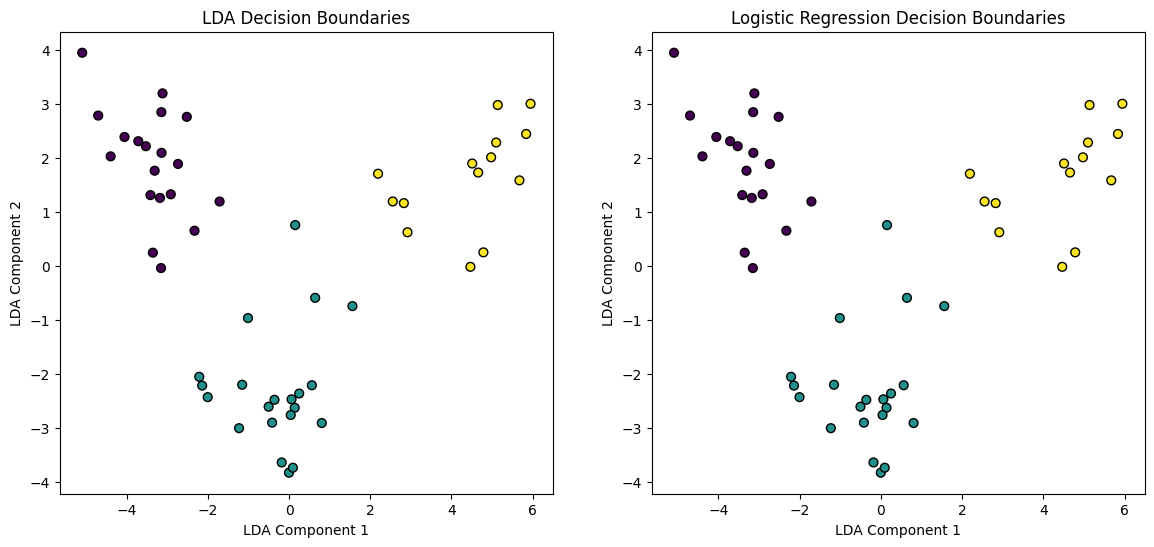

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("LDA Classifier Performance:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")
print("Confusion Matrix:\n", conf_matrix_lda)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("\nLogistic Regression Classifier Performance:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
lda_2d = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda_2d.fit_transform(X_train, y_train)
X_test_lda = lda_2d.transform(X_test)
lda_2d.fit(X_train_lda, y_train)
log_reg_2d = LogisticRegression(max_iter=200)
log_reg_2d.fit(X_train_lda, y_train)
def plot_decision_boundaries_no_bg(model, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.title(title)
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_decision_boundaries_no_bg(lda_2d, X_test_lda, y_test, "LDA Decision Boundaries")
plt.subplot(1, 2, 2)
plot_decision_boundaries_no_bg(log_reg_2d, X_test_lda, y_test, "Logistic Regression Decision Boundaries")
plt.show()
